### Problem 1


In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
houseData = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 注意，以下的索引加了双层中括号！DataFrame取多列，列名要用中括号括起来！

In [5]:
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


In [6]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


### subplots函数只设置了一排的话，ax索引时用一个index即可

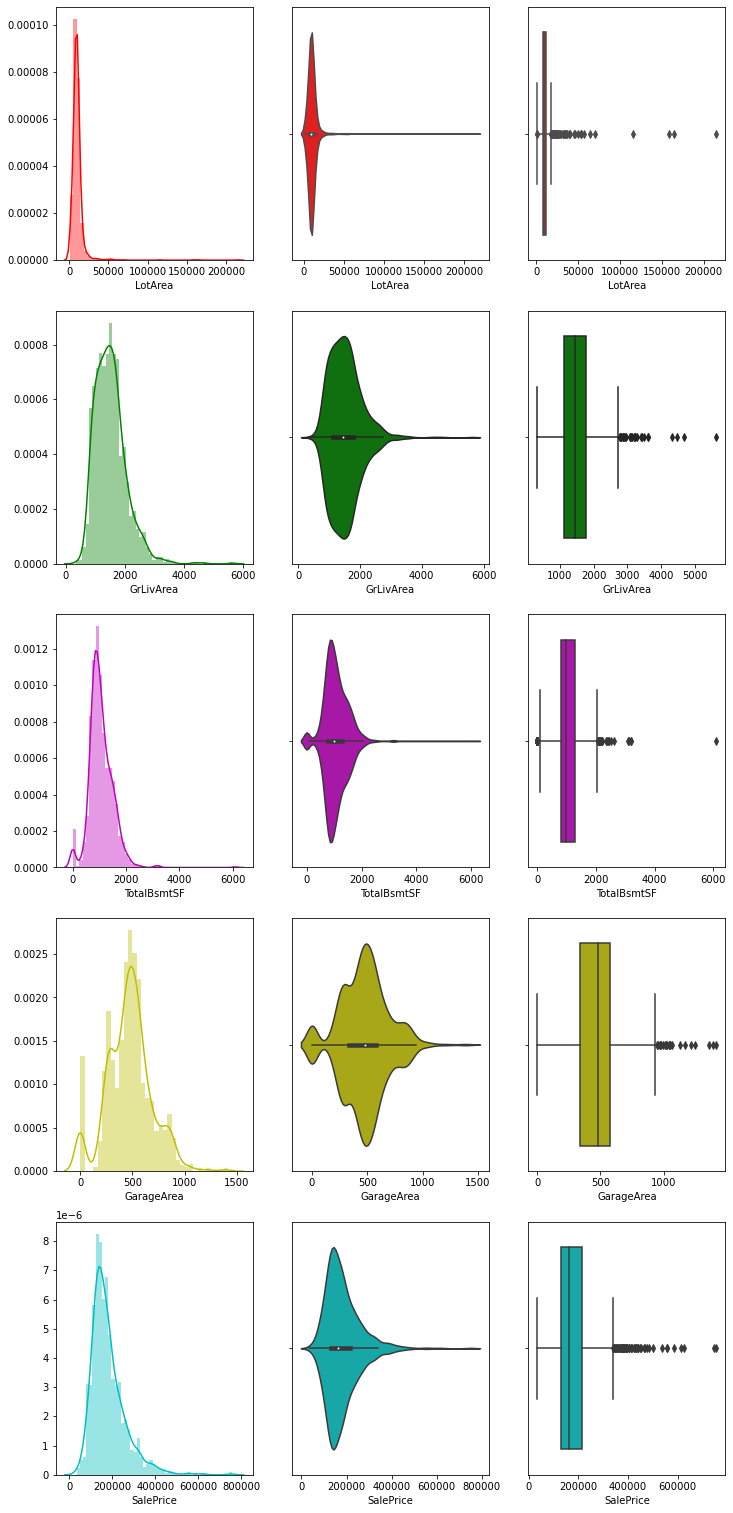

In [35]:
f, axes = plt.subplots(5, 3, figsize=(12, 27))
colors = ['r', 'g', 'm', 'y', 'c']

count = 0
for var in houseNumData:
    sb.distplot(houseNumData[var], color=colors[count], ax=axes[count, 0])
    sb.violinplot(houseNumData[var], color=colors[count], ax=axes[count, 1])
    sb.boxplot(houseNumData[var], color=colors[count], ax=axes[count, 2])
    count += 1

In [8]:
houseNumData.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


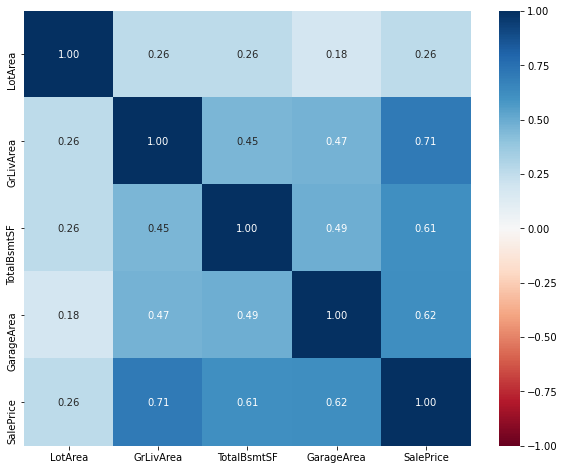

In [37]:
f, axes = plt.subplots(1, 1, figsize=(10,8))
sb.heatmap(houseNumData.corr(), vmin=-1, vmax=1, fmt=".2f", annot=True, cmap='RdBu')

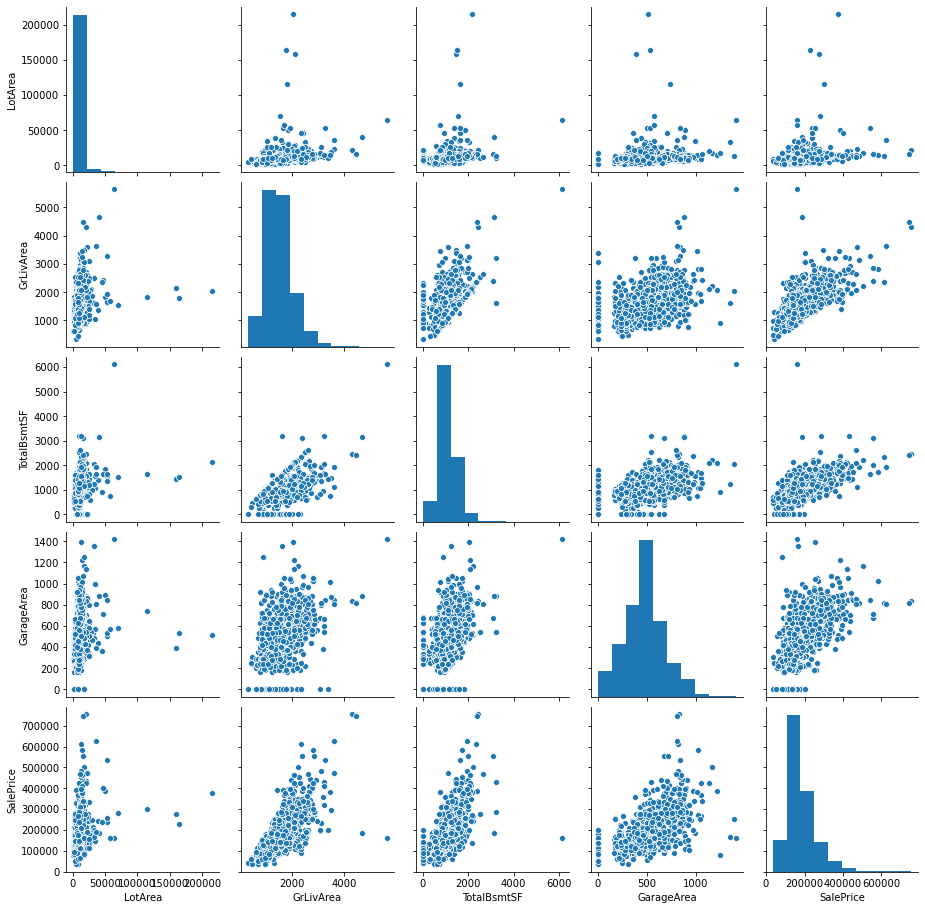

In [11]:
sb.pairplot(data=houseNumData)

### Problem 2

In [12]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [38]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


In [14]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']], dtype=object)
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [15]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   Neighborhood  1460 non-null   object
 2   BldgType      1460 non-null   object
 3   OverallQual   1460 non-null   object
dtypes: object(4)
memory usage: 45.8+ KB


In [16]:
"""f, axes = plt.subplots(1, 4, figsize=(24, 6))
sb.catplot(y = "MSSubClass", data = houseCatData, kind = "count", ax=axes[0])
sb.catplot(y = "Neighborhood", data = houseCatData, kind = "count", ax=axes[1])
sb.catplot(y = "BldgType", data = houseCatData, kind = "count", ax=axes[2])
sb.catplot(y = "OverallQual", data = houseCatData, kind = "count", ax=axes[3])
这样是错的，因为
UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
"""

'f, axes = plt.subplots(1, 4, figsize=(24, 6))\nsb.catplot(y = "MSSubClass", data = houseCatData, kind = "count", ax=axes[0])\nsb.catplot(y = "Neighborhood", data = houseCatData, kind = "count", ax=axes[1])\nsb.catplot(y = "BldgType", data = houseCatData, kind = "count", ax=axes[2])\nsb.catplot(y = "OverallQual", data = houseCatData, kind = "count", ax=axes[3])\n这样是错的，因为\nUserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot\n'

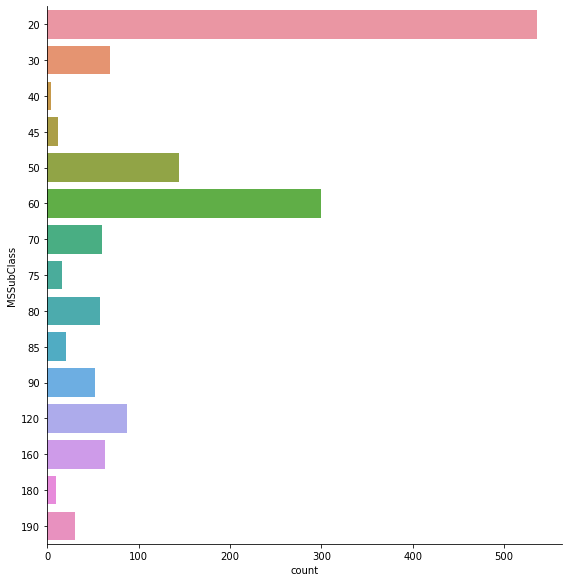

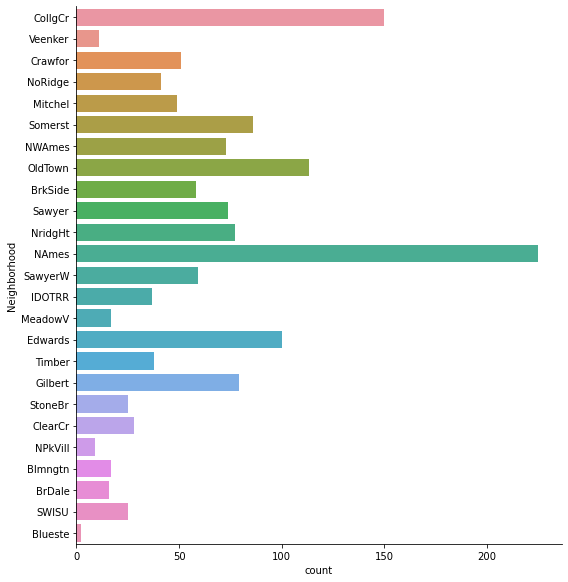

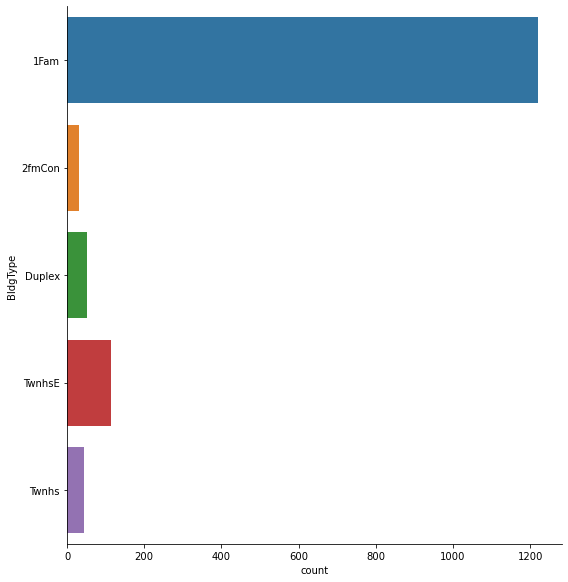

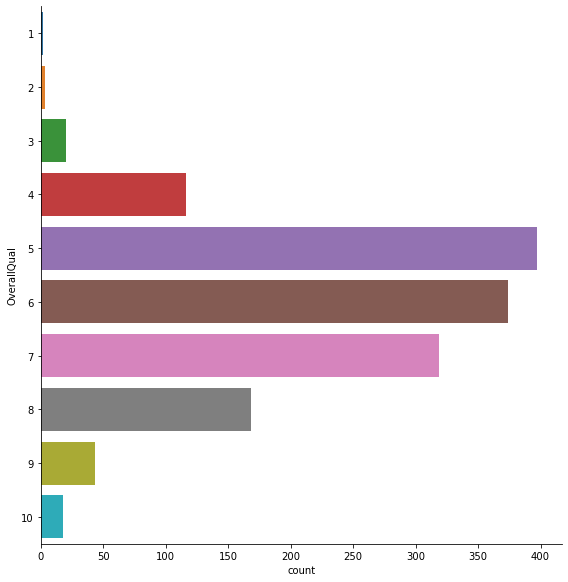

In [17]:
sb.catplot(y = "MSSubClass", data = houseCatData, kind = "count", height = 8)
sb.catplot(y = "Neighborhood", data = houseCatData, kind = "count", height = 8)
sb.catplot(y = "BldgType", data = houseCatData, kind = "count", height = 8)
sb.catplot(y = "OverallQual", data = houseCatData, kind = "count", height = 8)

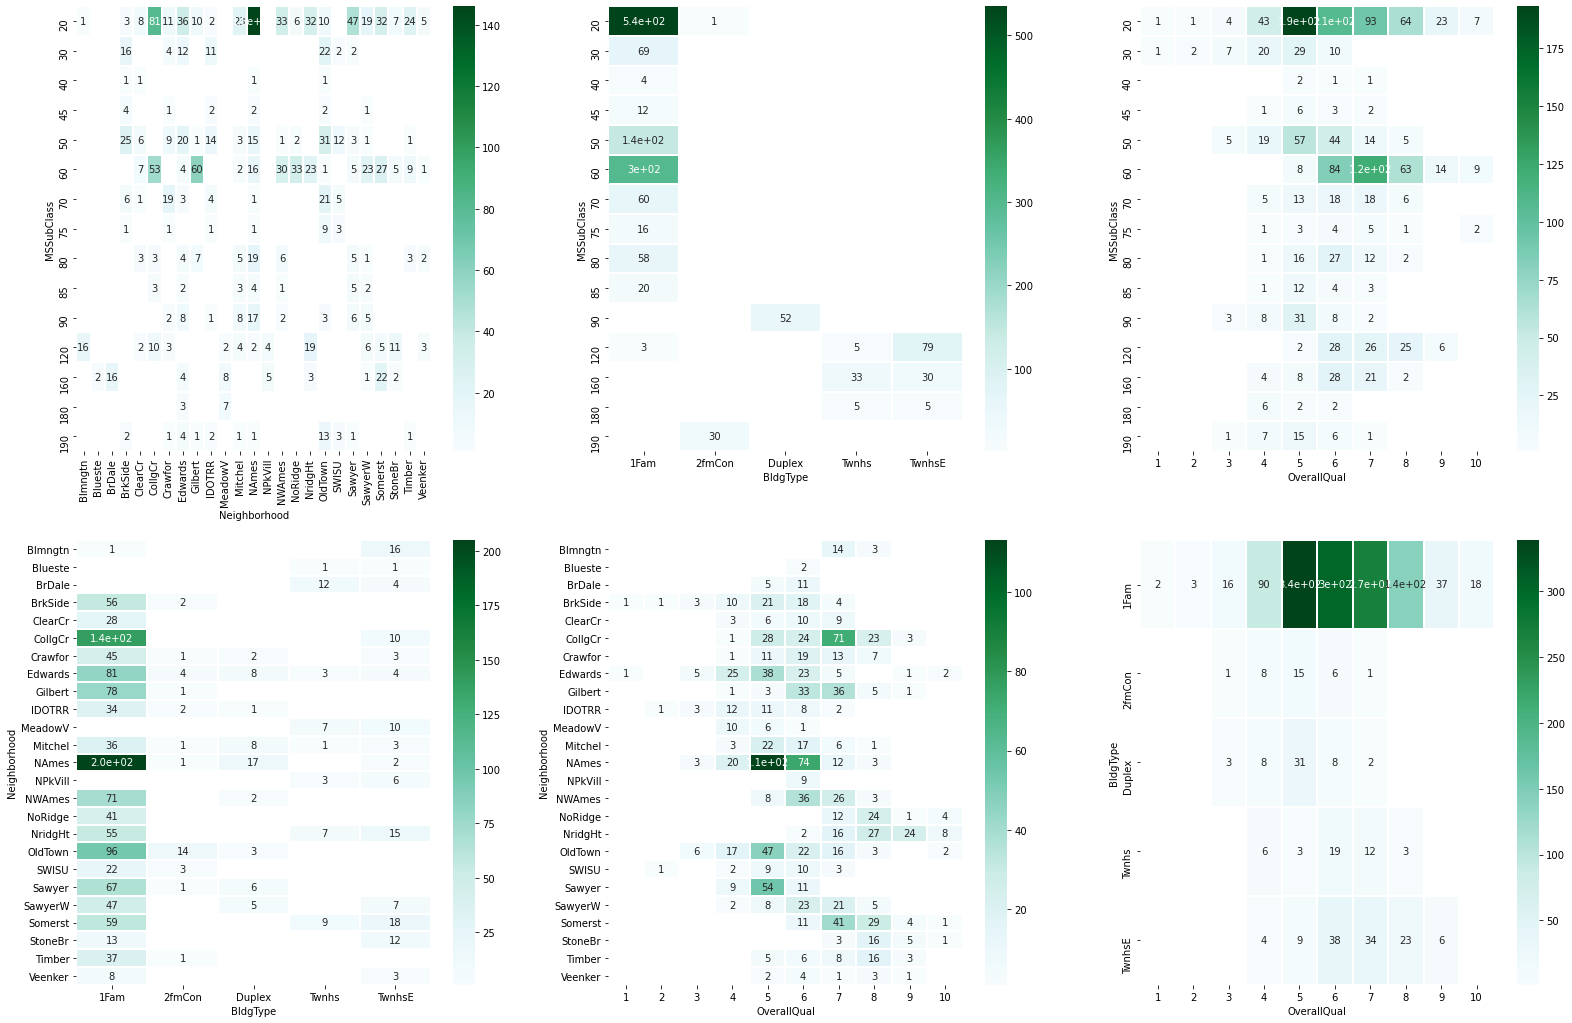

In [30]:
f, axes = plt.subplots(2, 3, figsize=(27, 18))

sb.heatmap(houseCatData.groupby(["MSSubClass", "Neighborhood"]).size().unstack(), linewidths=1, annot=True, cmap="BuGn", ax=axes[0][0])
sb.heatmap(houseCatData.groupby(["MSSubClass", "BldgType"]).size().unstack(), linewidths=1, annot=True, cmap="BuGn", ax=axes[0][1])
sb.heatmap(houseCatData.groupby(["MSSubClass", "OverallQual"]).size().unstack(), linewidths=1, annot=True, cmap="BuGn", ax=axes[0][2])
sb.heatmap(houseCatData.groupby(["Neighborhood", "BldgType"]).size().unstack(), linewidths=1, annot=True, cmap="BuGn", ax=axes[1][0])
sb.heatmap(houseCatData.groupby(["Neighborhood", "OverallQual"]).size().unstack(), linewidths=1, annot=True, cmap="BuGn", ax=axes[1][1])
sb.heatmap(houseCatData.groupby(["BldgType", "OverallQual"]).size().unstack(), linewidths=1, annot=True, cmap="BuGn", ax=axes[1][2])


TypeError: unsupported operand type(s) for /: 'str' and 'int'

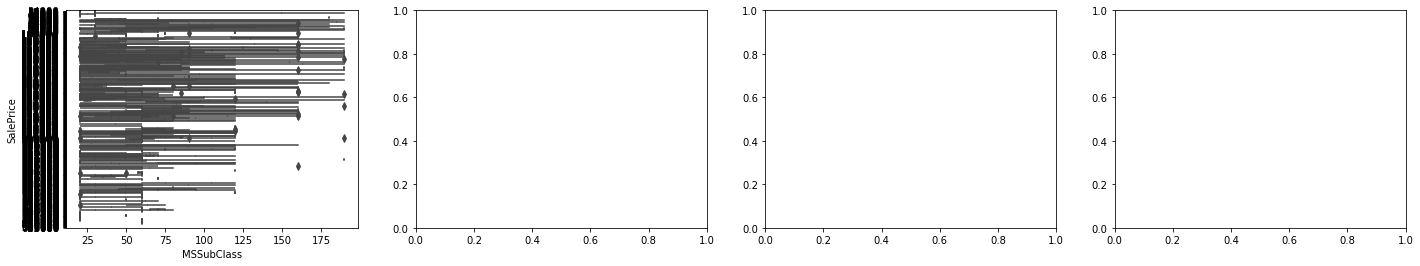

In [39]:
f, axes = plt.subplots(1, 4, figsize=(24, 4))

sb.boxplot(x=houseCatData['MSSubClass'], y=houseNumData['SalePrice'], data=houseCatData, orient='h', ax=axes[0])
sb.boxplot(x=houseCatData['Neighborhood'], y=houseNumData['SalePrice'], data=houseCatData, orient='h', ax=axes[1])
sb.boxplot(x=houseCatData['BldgType'], y=houseNumData['SalePrice'], data=houseCatData, orient='h', ax=axes[2])
sb.boxplot(x=houseCatData['OverallQual'], y=houseNumData['SalePrice'], data=houseCatData, orient='h', ax=axes[3])